Publisher Analysis

In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [7]:
from scripts.data_loader import load_data
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
df = load_data("../data/raw_analyst_ratings.csv")

In [8]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


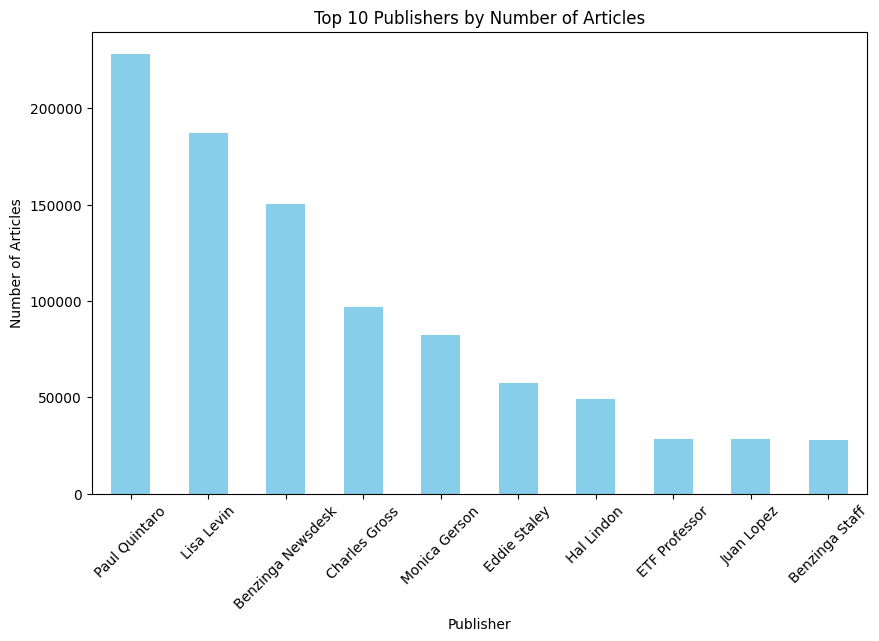

In [9]:
publisher_counts.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Publishers by Number of Articles")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

publisher
Brett Phillips            1.00
Eric Martin               1.00
Frank Ochoa               0.80
giovannimola              0.80
Ben Reynolds              0.80
The Professor             0.80
White Diamond Research    0.65
Happy Trading             0.65
Michael Prus              0.60
Robert Morris             0.60
Name: sentiment, dtype: float64


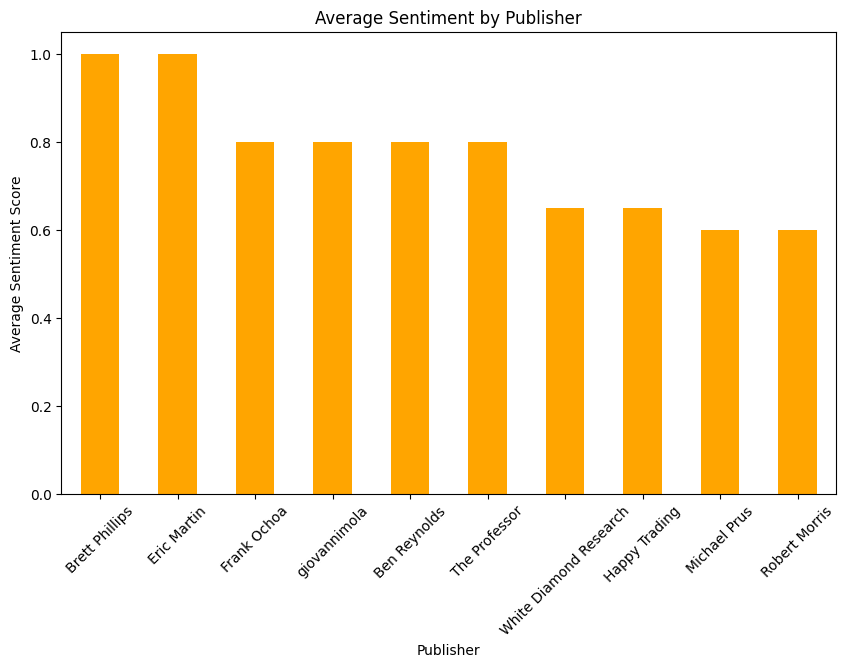

In [10]:
df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_by_publisher = df.groupby('publisher')['sentiment'].mean().sort_values(ascending=False)
print(sentiment_by_publisher.head(10))
sentiment_by_publisher.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Average Sentiment by Publisher")
plt.xlabel("Publisher")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.show()

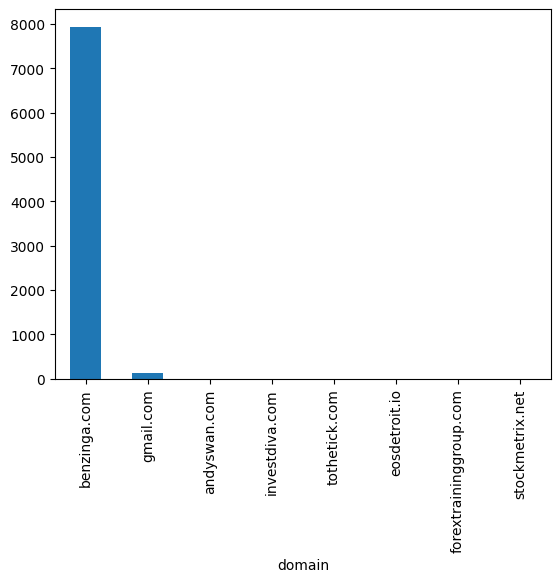

In [6]:
df['domain'] = df['publisher'].str.extract(r'@([A-Za-z0-9.-]+)')
domain_counts = df['domain'].value_counts()
domain_counts.head(10).plot(kind='bar')
plt.show()